<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Decision%20Tree/DecisionTreeRegressor_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
dados = pd.read_csv( './sample_data/california_housing_train.csv' )
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [40]:
# features com exceção do valor que queremos precer, que no caso é o nosso (y)
X = dados.drop( 'median_house_value', axis = 1)

# y = valor que qurecemos realizar a previsão
y = dados['median_house_value']

Xtrain, Xteste, ytrain, yteste = train_test_split( X, y, test_size=0.5, random_state=0 )

# Encontrando o melhor hiperparâmetro **max_depth**

In [41]:
melhor_erro           = 9999999999
erro_medio_quadrado   = 0
melhor_max_depth      = 1
tentativas            = 0

while tentativas < 50:
  modelo              = DecisionTreeRegressor( max_depth=melhor_max_depth, random_state=0 )
  ypred               = modelo.fit( Xtrain, ytrain ).predict( Xteste )
  erro_medio_quadrado = np.sqrt( mean_squared_error( yteste, ypred ) )

  if ( erro_medio_quadrado <= melhor_erro):
    melhor_erro = erro_medio_quadrado
    melhor_max_depth += 1

  tentativas+=1

print('Melhor max_depth: {}'.format( melhor_max_depth ) )
print( 'Melhor erro_medio_quadrado: {}'.format( melhor_erro ) )

Melhor max_depth: 10
Melhor erro_medio_quadrado: 66671.7497213204


In [38]:
  modelo = DecisionTreeRegressor( max_depth=2, random_state=0 )
  ypred  = modelo.fit( Xtrain, ytrain ).predict( Xteste )

# Encontrando o melhor hiperparâmetro **min_samples_leaf**

In [42]:
melhor_erro              = 9999999999
erro_medio_quadrado      = 0
melhor_samples_leaf      = 1
tentativas               = 0

while tentativas < 50:
  modelo                 = DecisionTreeRegressor( min_samples_leaf=melhor_samples_leaf, random_state=0 )
  ypred                  = modelo.fit( Xtrain, ytrain ).predict( Xteste )
  erro_medio_quadrado    = np.sqrt( mean_squared_error( yteste, ypred ) )

  if ( erro_medio_quadrado <= melhor_erro):
    melhor_erro = erro_medio_quadrado
    melhor_samples_leaf += 1

  tentativas+=1

print('Melhor min_samples_leaf: {}'.format( melhor_samples_leaf ) )
print( 'Melhor erro_medio_quadrado: {}'.format( melhor_erro ) )

Melhor min_samples_leaf: 11
Melhor erro_medio_quadrado: 62321.724893080114


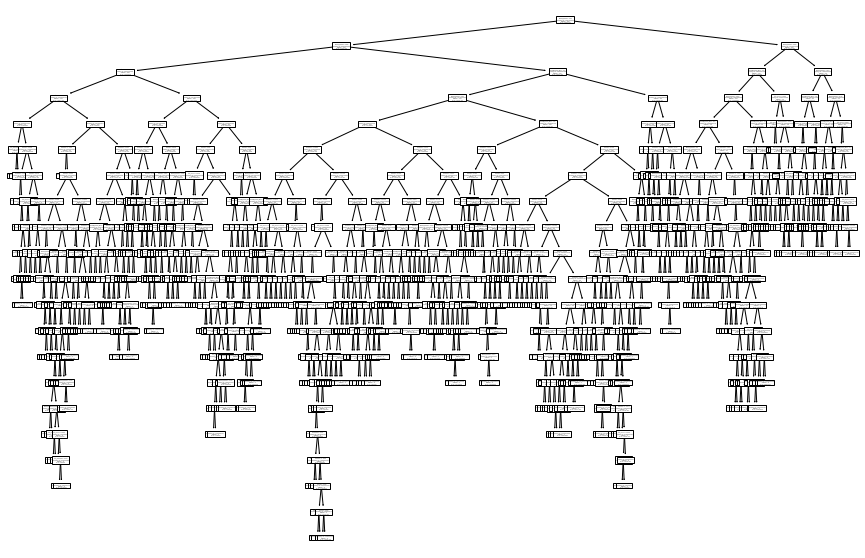

In [43]:
pylab.figure(figsize=(15,10))

plot_tree( modelo, feature_names=Xtrain.columns );